In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This code is correct for atomic units. A good choice of parameters is:
$$T=1.0$$
$$\omega=0.5$$
$$dt=0.2$$

The correctness has also been tested for real units. The following parameter is good enough for kinetic energy estimators, but does not work perfectly for pressure estimators:
$$T=300.0$$
$$\omega=5.0$$
$$dt=0.001$$

For $T=500.0$, the primitive kinetic energy estimator gives the correct result, while the centroid-virial one does not. The reason remains for further investigation.

In [1]:
def errbar(data):
    nsamp = 500
    nevery = int(data.shape[0] / nsamp)
    data_ = np.zeros(nsamp)
    for k in range(nsamp):
        data_[k] = data[k*nevery:(k+1)*nevery].mean()
    errbar_ = np.sqrt(data_.var()/(nsamp-1))
    return errbar_

In [8]:
kepr_ = np.load("task6.npy")

In [9]:
t_prim_lmp = kepr_[:, 0]
t_vir_lmp = kepr_[:, 1]
t_cv_lmp = kepr_[:, 2]
p_prim_lmp = kepr_[:, 3]
p_cv_lmp = kepr_[:, 4]
t_prim_lmp_mean = t_prim_lmp[10::].mean()
t_vir_lmp_mean = t_vir_lmp[10::].mean()
t_cv_lmp_mean = t_cv_lmp[10::].mean()
p_prim_lmp_mean = p_prim_lmp[10::].mean()
p_cv_lmp_mean = p_cv_lmp[10::].mean()

In [10]:
tprim_lmperr = errbar(t_prim_lmp[10::])
tvir_lmperr = errbar(t_vir_lmp[10::])
tcv_lmperr = errbar(t_cv_lmp[10::])
pprim_lmperr = errbar(p_prim_lmp[10::])
pcv_lmperr = errbar(p_cv_lmp[10::])

In [11]:
t_vir_lmp_mean

0.823243368631121

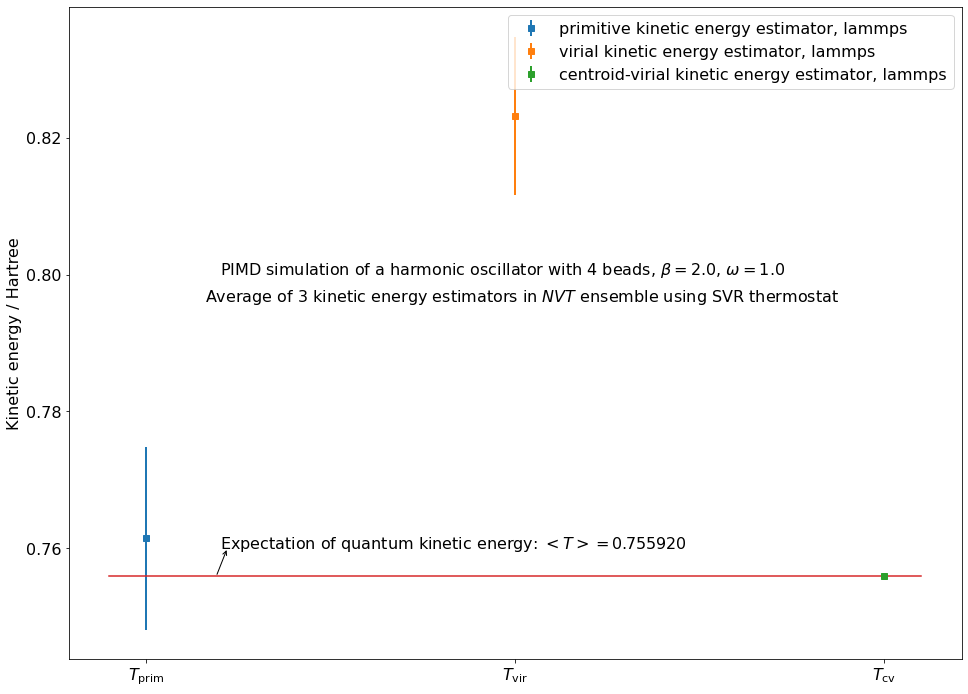

In [26]:
plt.figure(figsize = (16, 12))
plt.xticks([0, 1, 2], ["$T_{\mathrm{prim}}$", "$T_{\mathrm{vir}}$", "$T_{\mathrm{cv}}$"], fontsize = 16)
# plt.xticks([], [], fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel("Kinetic energy / Hartree", fontsize = 16)
# plt.errorbar(0, t_prim_mean, 1.0*tprimerr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive kinetic energy estimator, model code")
# plt.errorbar(1, t_cv_mean, 1.0*tcverr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial kinetic energy estimator, model code")
plt.errorbar(0, t_prim_lmp_mean, 1.0*tprim_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive kinetic energy estimator, lammps")
plt.errorbar(1, t_vir_lmp_mean, 1.0*tvir_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "virial kinetic energy estimator, lammps")
plt.errorbar(2, t_cv_lmp_mean, 1.0*tcv_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial kinetic energy estimator, lammps")
plt.legend(fontsize = 16)
plt.text(0.2, 0.760, "Expectation of quantum kinetic energy: $<T>=0.755920$", fontsize = 16)
plt.text(0.2, 0.80, "PIMD simulation of a harmonic oscillator with 4 beads, $\\beta=2.0$, $\omega=1.0$", fontsize = 16)
plt.text(0.16, 0.796, "Average of 3 kinetic energy estimators in $NVT$ ensemble using SVR thermostat", fontsize = 16)
plt.annotate("", xy=(0.19, 0.7559), xytext=(0.22, 0.760),arrowprops=dict(arrowstyle="<-"))
plt.plot(np.linspace(-0.1, 2.1, 10), 0.755920*np.ones(10))

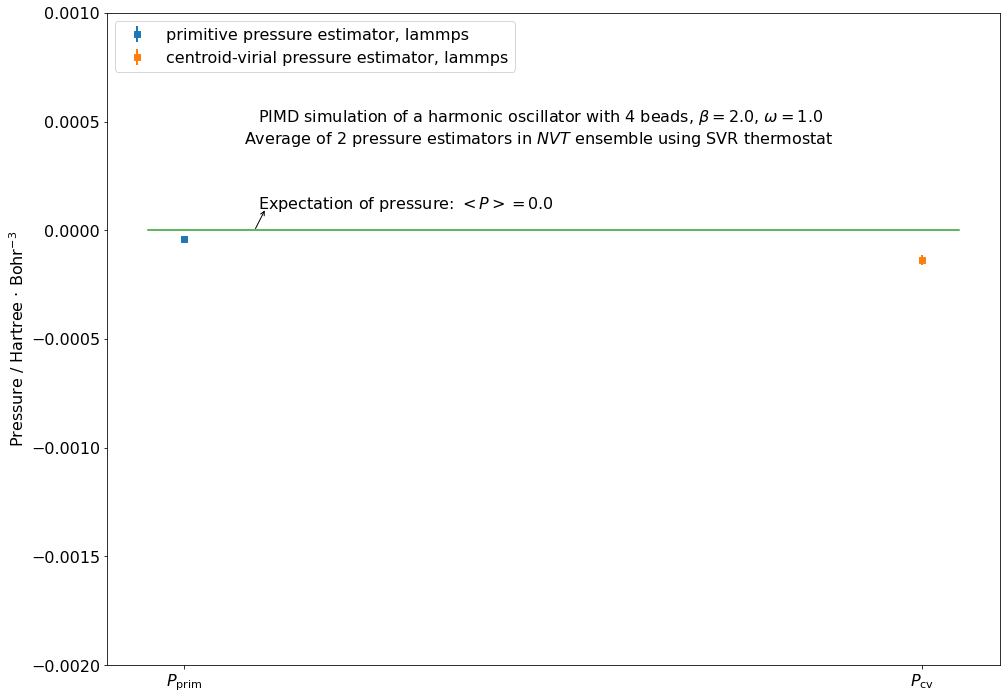

In [23]:
plt.figure(figsize = (16, 12))
plt.xticks([0, 2], ["$P_{\mathrm{prim}}$", "$P_{\mathrm{cv}}$"], fontsize = 16)
# plt.xticks([], [], fontsize = 16)
plt.ylim(-2e-3, 1e-3)
plt.yticks(fontsize = 16)
plt.ylabel("Pressure / Hartree $\cdot$ Bohr$^{-3}$", fontsize = 16)
# plt.errorbar(0, t_prim_mean, 1.0*tprimerr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive kinetic energy estimator, model code")
# plt.errorbar(1, t_cv_mean, 1.0*tcverr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial kinetic energy estimator, model code")
plt.errorbar(0, p_prim_lmp_mean, 1.0*pprim_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive pressure estimator, lammps")
plt.errorbar(2, p_cv_lmp_mean, 1.0*pcv_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial pressure estimator, lammps")
plt.legend(fontsize = 16, loc="upper left")
plt.text(0.2, 1e-4, "Expectation of pressure: $<P>=0.0$", fontsize = 16)
plt.text(0.2, 5e-4, "PIMD simulation of a harmonic oscillator with 4 beads, $\\beta=2.0$, $\omega=1.0$", fontsize = 16)
plt.text(0.16, 4e-4, "Average of 2 pressure estimators in $NVT$ ensemble using SVR thermostat", fontsize = 16)
plt.annotate("", xy=(0.19, 0), xytext=(0.22, 1e-4),arrowprops=dict(arrowstyle="<-"))
plt.plot(np.linspace(-0.1, 2.1, 10), 0.0*np.ones(10))

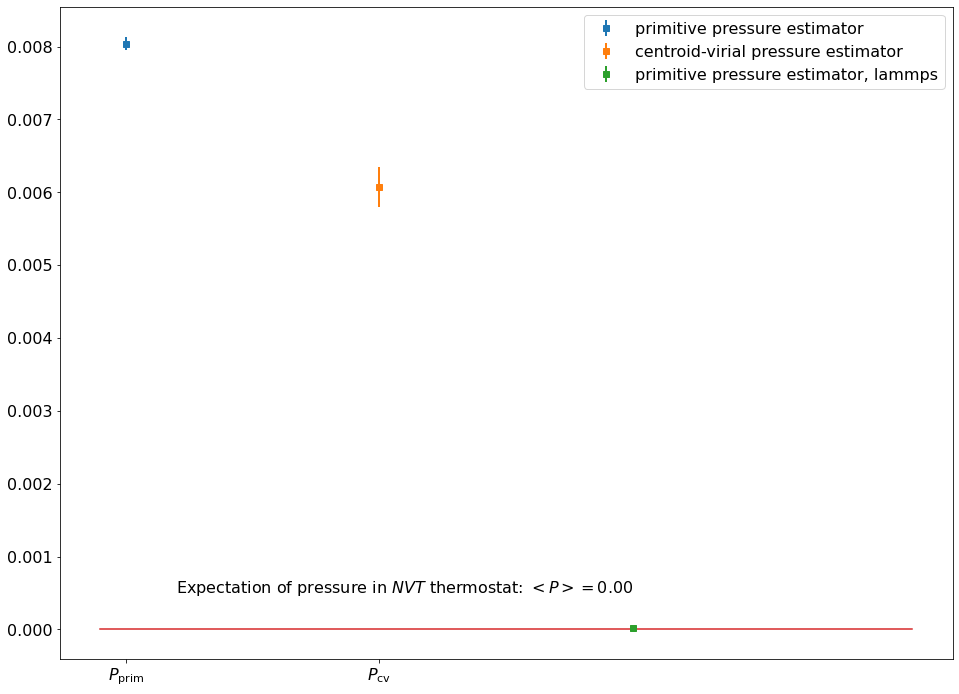

In [627]:
plt.figure(figsize = (16, 12))
plt.xticks([0, 1], ["$P_{\mathrm{prim}}$", "$P_{\mathrm{cv}}$"], fontsize = 16)
plt.yticks(fontsize = 16)
plt.errorbar(0, p_prim_mean, 3.0*pprimerr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive pressure estimator")
plt.errorbar(1, p_cv_mean, 5.0*pcverr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "centroid-virial pressure estimator")
plt.errorbar(2, p_prim_lmp_mean, 1.0*pprim_lmperr, marker = "s", linewidth = 0, elinewidth = 2.0, label = "primitive pressure estimator, lammps")
plt.legend(fontsize = 16)
plt.text(0.2, 0.0005, "Expectation of pressure in $NVT$ thermostat: $<P>=0.00$", fontsize = 16)
# plt.text(0.2, 0.0035, "Harmonic Oscillator, PILE$\_$G thermostat, 4 beads", fontsize = 16)
# plt.text(0.2, 0.003, "Average of 2 pressure estimators", fontsize = 16)
plt.plot(np.linspace(-0.1, 3.1, 10), 0.*np.ones(10))